######################
# System Information
######################

In [26]:
# show nvidia gpu
!nvidia-smi

Mon Mar  3 23:36:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             35W /   70W |     632MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [65]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [28]:
# Query CPU information
print("CPU Information is shown below:")
!cat /proc/cpuinfo | grep 'model name' | uniq

CPU Information is shown below:
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz


In [29]:
import psutil

# Check memory usage
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 18.3%


In [1]:
# Ensure required libraries are installed
!pip install tensorflow matplotlib -q

######################
# TensorFlow Model
######################

In [48]:
from rich import print #  interactive text formatting in the terminal.

In [15]:
# Import libraries
import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow import keras  # High-level neural networks API for deep learning.
import numpy as np




In [3]:
!pip uninstall -y tensorflow
!pip install tensorflow[and-cuda] -q



Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.3 MB/s eta 0:00:00

In [53]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



# Check shapes
print("Training data shape:", x_train.shape, y_train.shape)  # (60000, 28, 28), (60000,)
print("Test data shape:", x_test.shape, y_test.shape)  # (10000, 28, 28), (10000,)

# Check unique labels
print("Unique labels:", np.unique(y_train))  # Should print digits 0-9

# Print a sample image array
print(f"First image array:\n , {x_train[0][:10]}\n")


print(f"[blue]First image label: {y_train[0]}[/blue]")

Training data shape:
(60000, 28, 28)
(60000,)

Test data shape:
(10000, 28, 28)
(10000,)

Unique labels: [0 1 2 3 4 5 6 7 8 9]

First image array:
 , [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154
    0   0   0   0   0   0   0   0   0   0]]

First image label: 5

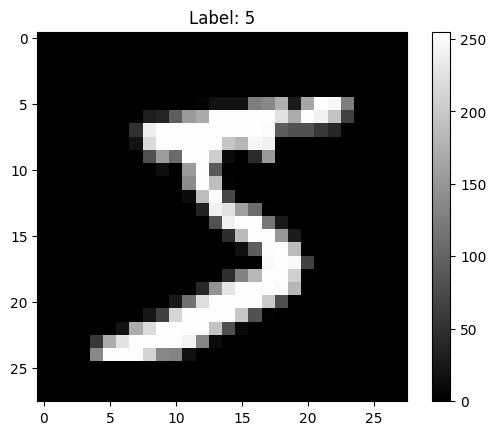

In [54]:
import matplotlib.pyplot as plt

# Show first training image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.show()


In [55]:
######################
# TensorFlow Model
######################
# Load MNIST dataset in TensorFlow
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Define a simple model

tf_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile and train the model
tf_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

print("\nTraining TensorFlow Model...")
history = tf_model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Training TensorFlow Model...

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8579 - loss: 0.4848 - val_accuracy: 0.9555 - val_loss: 0.1432
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9546 - loss: 0.1547 - val_accuracy: 0.9701 - val_loss: 0.1019
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9661 - loss: 0.1113 - val_accuracy: 0.9733 - val_loss: 0.0870


In [56]:
history.history

{'accuracy': [0.9142333269119263, 0.9567000269889832, 0.9672499895095825],
 'loss': [0.2951621115207672, 0.14627526700496674, 0.10932312905788422],
 'val_accuracy': [0.9555000066757202, 0.9700999855995178, 0.9732999801635742],
 'val_loss': [0.1431984305381775, 0.10188557207584381, 0.08699996024370193]}

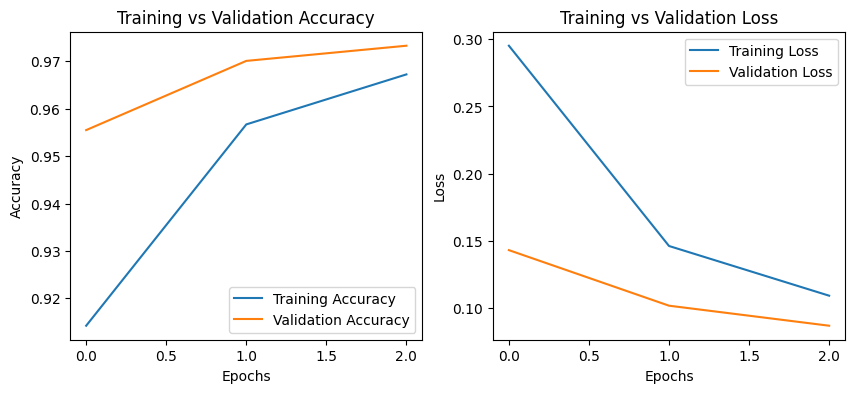

In [57]:
import matplotlib.pyplot as plt

# Extract values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1,2,2)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()


######################
# PyTorch Model
######################

In [58]:
# Ensure required libraries are installed
!pip install torch torchvision matplotlib -q

# Import libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [59]:
# Set device to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda

In [60]:
# Load MNIST dataset in PyTorch
transform = torchvision.transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a simple neural network
class PyTorchModel(nn.Module):
    def __init__(self):
        super(PyTorchModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        return self.fc2(x)

# Instantiate and move model to GPU if available
pytorch_model = PyTorchModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)


def train_pytorch(model, train_loader, test_loader, optimizer, criterion, epochs=3):
    model.train()
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(epochs):
        total_loss = 0
        correct_train, total_train = 0, 0

        # Training loop
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        # Store average training loss & accuracy
        train_loss = total_loss / len(train_loader)
        train_acc = correct_train / total_train
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        # Validation loop
        model.eval()
        total_val_loss = 0
        correct_val, total_val = 0, 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        # Store average validation loss & accuracy
        val_loss = total_val_loss / len(test_loader)
        val_acc = correct_val / total_val
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    return history  # Return history dictionary




In [61]:
print("\nTraining PyTorch Model...")
history = train_pytorch(pytorch_model, train_loader, test_loader, optimizer, criterion, epochs=3)


Training PyTorch Model...

Epoch 1 | Train Loss: 0.3748 | Val Loss: 0.1836 | Train Acc: 0.8963 | Val Acc: 0.9464

Epoch 2 | Train Loss: 0.1543 | Val Loss: 0.1237 | Train Acc: 0.9549 | Val Acc: 0.9634

Epoch 3 | Train Loss: 0.1054 | Val Loss: 0.0966 | Train Acc: 0.9692 | Val Acc: 0.9707

In [62]:
history

{'train_loss': [0.37477584697925714, 0.15426648871651463, 0.10540394378957083],
 'val_loss': [0.18364703976460228, 0.12369118711561154, 0.09664912885915085],
 'train_acc': [0.8963, 0.9549, 0.9692],
 'val_acc': [0.9464, 0.9634, 0.9707]}

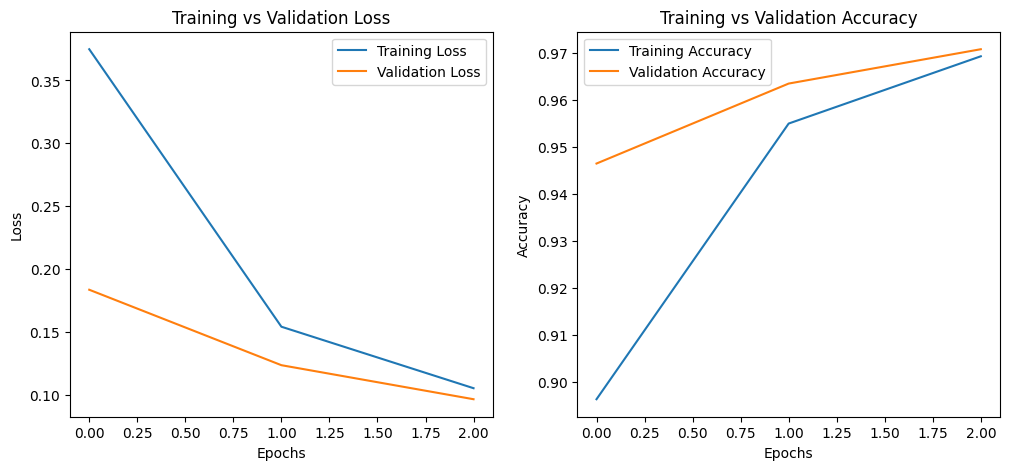

In [64]:
import matplotlib.pyplot as plt

# Extract loss & accuracy
train_loss = history['train_loss']
val_loss = history['val_loss']
train_acc = history['train_acc']
val_acc = history['val_acc']

# Create two subplots: one for loss, one for accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")



plt.show()
